In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import csv
import EoN

In [2]:
# Import Reddit Hyperlink network
edges = np.loadtxt('data/edges.csv', delimiter=',', dtype=int, skiprows=1)
G = nx.Graph()
G.add_edges_from(edges)

## Eigenvector centrality

Eigenvector centrality is an important metric because a node with high eigenvector centrality is likely to be well-connected to other well-connected nodes. In an epidemic spreading model, this means that such nodes are more likely to be infected early in the epidemic, and therefore may play a key role in the spread of the epidemic. Moreover, such nodes may also have greater influence in terms of spreading the infection to their neighbors, making them important targets for intervention.

In [3]:
# Import node eigenvector centralities
with open('results/eigenvector_centrality.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)
    eigenvector = {int(row[0]): float(row[1]) for row in reader}

Max eigenvector centrality: (59, 0.19980016082723698)


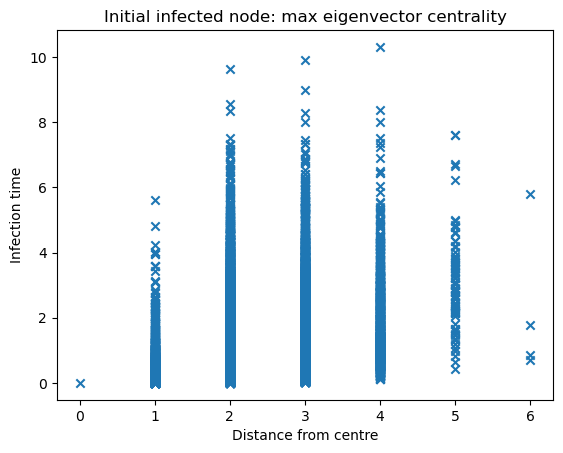

In [4]:
# Find node with highest eigenvector centrality
max_eigenvector_node = max(eigenvector, key=eigenvector.get)
print(f'Max eigenvector centrality: {(max_eigenvector_node, eigenvector[max_eigenvector_node])}')

# SI dynamics on the network, initial infected node with highest eigenvector centrality
sim = EoN.fast_SIR(G, tau=1, gamma=0, initial_infecteds=[max_eigenvector_node], return_full_data=True)

node_histories = {node: sim.node_history(node) for node in G.nodes()}
infection_times = {node: times[statuses.index('I')]
                   for node, (times, statuses) in node_histories.items()
                   if 'I' in statuses}
distances_from_centre = nx.shortest_path_length(G, source=max_eigenvector_node)
distance_time_pairs = [(distances_from_centre[node], infection_times[node]) for node in infection_times]

# Plot infection time vs distance from centre
plt.scatter(*zip(*distance_time_pairs), marker='x')
plt.title('Initial infected node: max eigenvector centrality')
plt.xlabel('Distance from centre')
plt.ylabel('Infection time')
plt.show()

Min eigenvector centrality: (858, 1.5684687372311454e-20)


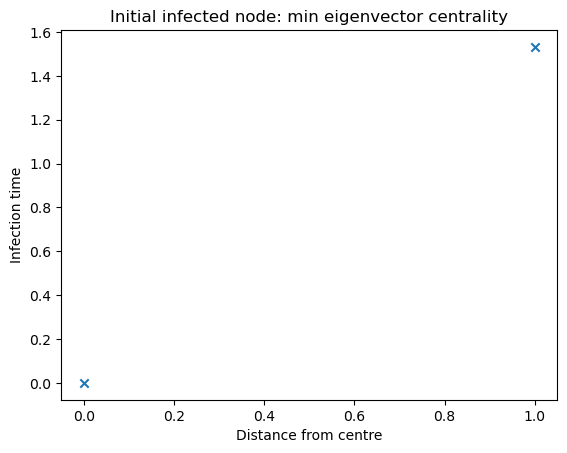

In [5]:
# Find node with lowest eigenvector centrality
min_eigenvector_node = min(eigenvector, key=eigenvector.get)
print(f'Min eigenvector centrality: {(min_eigenvector_node, eigenvector[min_eigenvector_node])}')

# SI dynamics on the network, initial infected node with lowest eigenvector centrality
sim = EoN.fast_SIR(G, tau=1, gamma=0, initial_infecteds=[min_eigenvector_node], return_full_data=True)

node_histories = {node: sim.node_history(node) for node in G.nodes()}
infection_times = {node: times[statuses.index('I')]
                   for node, (times, statuses) in node_histories.items()
                   if 'I' in statuses}
distances_from_centre = nx.shortest_path_length(G, source=min_eigenvector_node)
distance_time_pairs = [(distances_from_centre[node], infection_times[node]) for node in infection_times]

# Plot infection time vs distance from centre
plt.scatter(*zip(*distance_time_pairs), marker='x')
plt.title('Initial infected node: min eigenvector centrality')
plt.xlabel('Distance from centre')
plt.ylabel('Infection time')
plt.show()

## Betweenness centrality
Betweenness centrality is an important metric because a node with high betweenness centrality is likely to be a bridge between different parts of the network. In an epidemic spreading model, this means that such nodes are likely to lie on the paths of infection between different groups of nodes, making them important in terms of controlling the spread of the epidemic.

In [6]:
# Import node betweenness centralities
with open('results/betweenness_centrality.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)
    betweenness = {int(row[0]): float(row[1]) for row in reader}

Max betweenness centrality: (59, 0.11404735670207757)


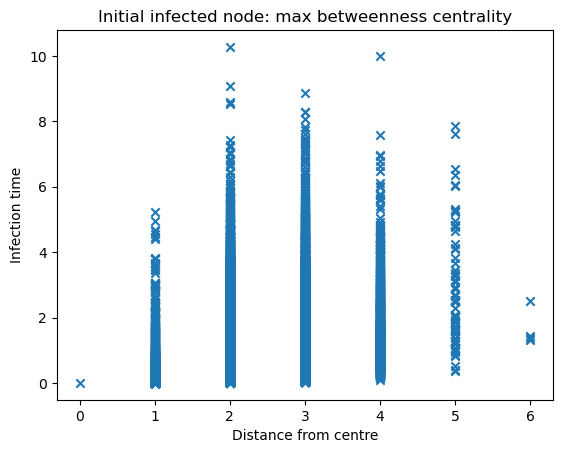

In [7]:
# Find node with highest betweenness centrality
max_betweenness_node = max(betweenness, key=betweenness.get)
print(f'Max betweenness centrality: {(max_betweenness_node, betweenness[max_betweenness_node])}')

# SI dynamics on the network, initial infected node with highest betweenness centrality
sim = EoN.fast_SIR(G, tau=1, gamma=0, initial_infecteds=[max_betweenness_node], return_full_data=True)

node_histories = {node: sim.node_history(node) for node in G.nodes()}
infection_times = {node: times[statuses.index('I')]
                   for node, (times, statuses) in node_histories.items()
                   if 'I' in statuses}
distances_from_centre = nx.shortest_path_length(G, source=max_betweenness_node)
distance_time_pairs = [(distances_from_centre[node], infection_times[node]) for node in infection_times]

# Plot infection time vs distance from centre
plt.scatter(*zip(*distance_time_pairs), marker='x')
plt.title('Initial infected node: max betweenness centrality')
plt.xlabel('Distance from centre')
plt.ylabel('Infection time')
plt.show()

Min betweenness centrality: (12, 0.0)


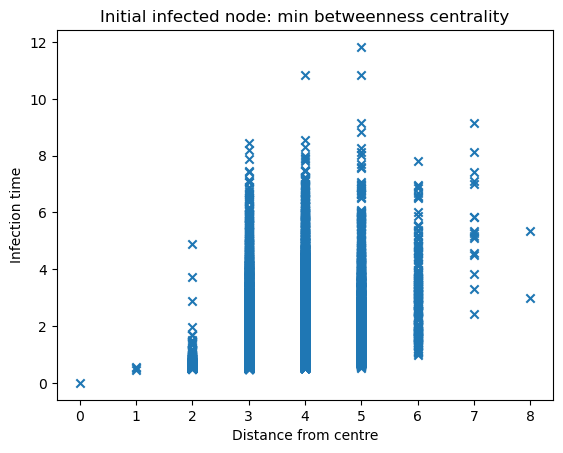

In [8]:
# Find node with lowest betweenness centrality
min_betweenness_node = min(betweenness, key=betweenness.get)
print(f'Min betweenness centrality: {(min_betweenness_node, betweenness[min_betweenness_node])}')

# SI dynamics on the network, initial infected node with lowest betweenness centrality
sim = EoN.fast_SIR(G, tau=1, gamma=0, initial_infecteds=[min_betweenness_node], return_full_data=True)

node_histories = {node: sim.node_history(node) for node in G.nodes()}
infection_times = {node: times[statuses.index('I')]
                   for node, (times, statuses) in node_histories.items()
                   if 'I' in statuses}
distances_from_centre = nx.shortest_path_length(G, source=min_betweenness_node)
distance_time_pairs = [(distances_from_centre[node], infection_times[node]) for node in infection_times]

# Plot infection time vs distance from centre
plt.scatter(*zip(*distance_time_pairs), marker='x')
plt.title('Initial infected node: min betweenness centrality')
plt.xlabel('Distance from centre')
plt.ylabel('Infection time')
plt.show()